<center>

### COSC2753 - Machine Learning

# **Exploratory Data Analysis (EDA)**

<center>────────────────────────────</center>
&nbsp;

## Table of Contents

</center>

<div style="text-align: left;">

<div style="display: inline-block; text-align: left;">

<h3>

[**I. Introduction**](#introduction)

</h3>

<h3>
    
[**II. Libraries Import and Data Preprocessing**](#libraries-import-and-data-preprocessing)

</h3>

<h4>

- [1. Importing Libraries](#1-importing-libraries)

</h4>

<h4>

- [2. Global Configuration](#2-global-configuration)

</h4>

<h4>

- [3. Data Loading](#3-data-loading)

</h4>

<h4>

- [4. Data Preprocessing](#4-data-preprocessing)

</h4>

<h5 style="margin-left: 20px;">

- [4.1. Data Types](#41-prerequisites)

</h5>

<h5 style="margin-left: 20px;">

- [4.2. Data Overview](#42-data-overview)

</h5>

<h5 style="margin-left: 20px;">

- [4.3. Data Validation](#43-data-validation)

</h5>

<h3>

[**III. Data Visualization**](#data-visualization)

</h3>

<h3>

[**IV. Data Cleaning**](#data-cleaning)

</h3>

<h3>

[**V. Exploratory Data Analysis**](#exploratory-data-analysis)

</h3>

<h3>
    
[**VI. Conclusion**](#conclusion)

</h3>

<h3>
    
[**VII. References**](#references)

</div>

&nbsp;

<center><em><sub>─────── End Of Section ───────</sub></em></center>


# I. Introduction

This notebook focuses on Exploratory Data Analysis (EDA) as the foundation for our machine learning workflow with the provided datasets. Through EDA, we will gain a comprehensive understanding of the data, including:

- Data cleaning and preprocessing.
- Features/Target variables distribution and relationships analysis.
- Correlation analysis.
- Outliers detection.
- Model selection and evaluation.

Upon finishing, this notebook will provide valuable insights of the data for subsequent stages.

<center><em><sub>─────── End Of Section ───────</sub></em></center>

# II. Libraries Import and Data Preprocessing 

## 1. Importing Libraries

In [906]:
print("Importing packages...")

# Import installed python packages
import pandas as pd  # Data manipulation
import numpy as np  # Linear algebra
import seaborn as sns  # Visualization
import matplotlib  # Plotting
import sklearn  # Machine learning
import tabulate  # Pretty printing
import time  # Time tracking
import sys  # System specific parameters and functions
import importlib  # Importing modules

# Import user-defined python scripts
sys.path.append("../../")  # Root directory
modules_to_reload = [
    "scripts.outlier_detector",
    "scripts.styler",
    "scripts.neko",
    "scripts.utils",
]

# Reload modules if they have been modified
start_time = time.time()  # Start time
missing_modules = []  # Missing modules

# Reload modules
for module_name in modules_to_reload:
    if module_name in sys.modules:
        importlib.reload(sys.modules[module_name])
    else:
        missing_modules.append(module_name)

# Recache missing modules
if missing_modules:
    print(f"Modules {missing_modules} not found. \nRecaching...")


# Import specific modules after reloading
from scripts.styler import Styler
from scripts.neko import Neko
from scripts.utils import Utils

# Version checking
print("Checking package versions...")

try:
    with open("../../requirements.txt", "r") as file:
        requirements = file.readlines()
except FileNotFoundError:
    print(f"File '../../requirements.txt' not found.")

# Check package versions
packages_to_check = [np, pd, sns, matplotlib, tabulate, sklearn]

for package in packages_to_check:
    Utils.version_check(package, requirements=requirements)

end_time = time.time()  # End time
runtime = end_time - start_time  # Runtime

print(f">>> Done in: {round(runtime, 3)}, seconds")

Importing packages...
Checking package versions...
>>> numpy is up to date: 1.26.4
>>> pandas is up to date: 2.2.1
>>> seaborn is up to date: 0.13.2
>>> matplotlib is up to date: 3.8.3
>>> tabulate is up to date: 0.9.0
>>> sklearn is up to date: 1.4.1.post1
>>> Done in: 0.005, seconds


## 2. Global Configuration

In [907]:
# Set global parameters
start_time = time.time()
print("Initializing project...")

# Initialize objects
styler = Styler()  # Text Styler
neko = Neko()  # Panda extension
bullet = ">>>"  # Bullet point
plt = matplotlib.pyplot  # Matplotlib

end_time = time.time()
runtime = end_time - start_time

# Configuration
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.precision", 3)

print(f"{bullet} Project initialized successfully...\n")

print(f"{bullet} Done in: {round(runtime, 3)} seconds")

Initializing project...


    /\_____/\
   /  o   o  \
  ( ==  ^  == )       Neko has arrived!
   )         (        An data visualizing extension for analyzing DataFrames.
  (           )       Art: https://www.asciiart.eu/animals/cats.
 ( (  )   (  ) )
(__(__)___(__)__)

>>> Project initialized successfully...

>>> Done in: 0.0 seconds


## 3. Data Loading

In [908]:
# Load the datasets
try:
    start_time = time.time()

    df_train = pd.read_csv("../../data/raw/data_train.csv")

    styler.draw_box("Dataset Overview")

    # Get data essence
    df_train_essense = neko.essense(df_train)

    print(df_train_essense)

    end_time = time.time()
    runtime = end_time - start_time
    print(f"\n>>> Done in: {round(runtime, 3)} seconds")  # Display runtime

except Exception as e:
    text = f" {bullet} Error: {str(e)}"
    print(text)

┌────────────────────┐
│  Dataset Overview  │
└────────────────────┘
╭────┬─────────────────────────────┬───────────╮
│    │ Attribute                   │ Value     │
├────┼─────────────────────────────┼───────────┤
│  0 │ Number of Rows              │ 202944    │
├────┼─────────────────────────────┼───────────┤
│  1 │ Number of Columns           │ 25        │
├────┼─────────────────────────────┼───────────┤
│  2 │ Data Types                  │ ['int64'] │
├────┼─────────────────────────────┼───────────┤
│  3 │ Total Missing Values        │ 0         │
├────┼─────────────────────────────┼───────────┤
│  4 │ Columns with Missing Values │ []        │
├────┼─────────────────────────────┼───────────┤
│  5 │ Number of Duplicates        │ 0         │
├────┼─────────────────────────────┼───────────┤
│  6 │ Memory Usage (MB)           │ 38.7      │
╰────┴─────────────────────────────┴───────────╯

>>> Done in: 0.351 seconds


### **Initial Data Exploration**

This initial exploration of the data yielded the following key observations:

- **Data Loading:** The dataset comprises approximately `200,000` rows and `25` columns. Given its size, careful selection of data cleaning and preprocessing techniques will be essential to ensure data quality and integrity for further analysis.

- **Data Type Consistency:** A positive aspect is that all columns possess the same data type (`int64`), potentially simplifying the data cleaning process.

- **Missing Value Assessment:** An initial check for missing values (`null`, `NaN`, or `empty values`) was conducted. This ensures the data is not empty or containing invalid values.

- **Duplicate Detection:** No duplicates were identified within the dataset at this stage (with the presence of the `Id` column).

### **Feature Explanation**

| Variable             | Description                                                                                                                                                                  | Category    |
| -------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------- |
| ID                   | Patient ID                                                                                                                                                                   | Numerical   |
| Status               | 0 = no diabetes, 1 = prediabetes or diabetes                                                                                                                                 | Categorical |
| HighBP               | 0 = no high BP, 1 = high BP                                                                                                                                                  | Categorical |
| HighChol             | 0 = no high cholesterol, 1 = high cholesterol                                                                                                                                | Categorical |
| CholCheck            | 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years                                                                                                    | Categorical |
| BMI                  | Body Mass Index                                                                                                                                                              | Numerical   |
| Smoker               | 0 = no, 1 = yes (smoked at least 100 cigarettes in lifetime)                                                                                                                 | Categorical |
| Stroke               | 0 = no, 1 = yes (history of stroke)                                                                                                                                          | Categorical |
| HeartDiseaseorAttack | 0 = no, 1 = yes (coronary heart disease or myocardial infarction)                                                                                                            | Categorical |
| PhysActivity         | 0 = no, 1 = yes (physical activity in past 30 days, excluding job)                                                                                                           | Categorical |
| Fruits               | 0 = no, 1 = yes (consume fruit ≥ 1 time per day)                                                                                                                             | Categorical |
| Veggies              | 0 = no, 1 = yes (consume vegetables ≥ 1 time per day)                                                                                                                        | Categorical |
| HvyAlcoholConsump    | 0 = no, 1 = yes (heavy alcohol consumption)                                                                                                                                  | Categorical |
| AnyHealthcare        | 0 = no, 1 = yes (health care coverage)                                                                                                                                       | Categorical |
| NoDocbcCost          | 0 = no, 1 = yes (unable to see doctor due to cost)                                                                                                                           | Categorical |
| GenHlth              | Scale 1-5: 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor                                                                                                        | Categorical |
| MentHlth             | Number of days in past 30 days with poor mental health (scale 1-30 days)                                                                                                     | Numerical   |
| PhysHlth             | Number of days in past 30 days with poor physical health (scale 1-30 days)                                                                                                   | Numerical   |
| DiffWalk             | 0 = no, 1 = yes (serious difficulty walking or climbing stairs)                                                                                                              | Categorical |
| Sex                  | 0 = female, 1 = male                                                                                                                                                         | Categorical |
| Age                  | 13-level age category: 1 = 18-24, 9 = 60-64, 13 = 80 or older                                                                                                                | Categorical |
| Education            | Scale 1-6: 1 = Never attended school or only kindergarten, 2 = Grades 1 through 8, 3 = Grades 9 through 11, 4 = Grade 12 or GED, 5 = College 1-3 years, 6 = College 4+ years | Categorical |
| Income               | Scale 1-8: 1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more                                                                                                 | Categorical |
| ExtraMedTest         | Result of an extra medical test (range -100 to 100)                                                                                                                          | Numerical   |
| ExtraAlcoholTest     | Result of an extra alcohol test (range -100 to 100)                                                                                                                          | Numerical   |

### **Conclusion**

- The `Id` column will be excluded in accordance with project specifications.

- This initial exploration reveals that the majority of the columns contain `categorical` features. This suggests a potential focus on `categorical data analysis` techniques for further exploration and model selection.

- An initial examination of the target variable (`Status`) reveals it consists of binary values (`0` or `1`). This characteristic indicates a `classification` problem, where we aim to predict the category (`0` or `1`) for new data points.

  &rArr; Given this binary nature, `Logistic Regression` emerges as a strong candidate for the initial model selection.


## 4. Data Preprocessing

### 4.1. Prerequisites

In [909]:
# Remove the Id column from the dataset as required
df_train.drop("Id", axis=1, inplace=True)

styler.draw_box("Dataset Overview (Id column removed)")

# Display data overview
print(df_train.info())

┌────────────────────────────────────────┐
│  Dataset Overview (Id column removed)  │
└────────────────────────────────────────┘
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                202944 non-null  int64
 1   HighChol              202944 non-null  int64
 2   CholCheck             202944 non-null  int64
 3   BMI                   202944 non-null  int64
 4   Smoker                202944 non-null  int64
 5   Stroke                202944 non-null  int64
 6   HeartDiseaseorAttack  202944 non-null  int64
 7   PhysActivity          202944 non-null  int64
 8   Fruits                202944 non-null  int64
 9   Veggies               202944 non-null  int64
 10  HvyAlcoholConsump     202944 non-null  int64
 11  AnyHealthcare         202944 non-null  int64
 12  NoDocbcCost           202944 non-null  int64
 13  GenHl

### 4.2. Data Overview

In [910]:
# Check for duplicates in the dataset
duplicates = df_train.duplicated().sum()  # Count duplicates

styler.draw_box("Duplicate Checking (Id column removed)")

if duplicates > 0:
    print(neko.essense(df_train))  # Display data essence
    print()

    # Print message about duplicates
    message = f"Found {duplicates} duplicates in the dataset"
    styled_message = styler.style(message, bold=True, italic=True)
    print(f"{bullet} {styled_message}")

    # Remove duplicates
    print(f"{bullet} Removing duplicates...")

    start_time = time.time()
    df_train.drop_duplicates(inplace=True)  # Remove duplicates
    end_time = time.time()

    runtime = end_time - start_time  # Runtime
    print(f"{bullet} Done in:", round(runtime, 3), "seconds")
else:
    # If no duplicates found
    message = "No duplicates in the dataset"
    styled_message = styler.style(message, bold=True, italic=True)
    print(f"{bullet} {styled_message}")

print()

# Display data essence after removal
styler.draw_box("Duplicate Checking After Removal")
print(neko.essense(data=df_train))

┌──────────────────────────────────────────┐
│  Duplicate Checking (Id column removed)  │
└──────────────────────────────────────────┘
╭────┬─────────────────────────────┬───────────╮
│    │ Attribute                   │ Value     │
├────┼─────────────────────────────┼───────────┤
│  0 │ Number of Rows              │ 202944    │
├────┼─────────────────────────────┼───────────┤
│  1 │ Number of Columns           │ 24        │
├────┼─────────────────────────────┼───────────┤
│  2 │ Data Types                  │ ['int64'] │
├────┼─────────────────────────────┼───────────┤
│  3 │ Total Missing Values        │ 0         │
├────┼─────────────────────────────┼───────────┤
│  4 │ Columns with Missing Values │ []        │
├────┼─────────────────────────────┼───────────┤
│  5 │ Number of Duplicates        │ 208       │
├────┼─────────────────────────────┼───────────┤
│  6 │ Memory Usage (MB)           │ 37.2      │
╰────┴─────────────────────────────┴───────────╯

>>> Found 208 duplicates in the

### **Conclusion** 
- Following the removal of the `Id` column, an initial analysis identified `208` duplicate data points within the dataset. 

  &rArr; To ensure data integrity and quality, these duplicates will be `removed` from the dataset before proceeding with further analysis.


In [911]:
# Display the overview of the training dataset
styler.draw_box("Dataset Description")
df_train.describe()

┌───────────────────────┐
│  Dataset Description  │
└───────────────────────┘


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.00,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000
mean,0.429,0.425,0.963,28.384,0.443,0.041,0.094,0.756,0.635,0.811,0.056,0.951,0.084,2.515,3.20,4.261,0.169,0.440,8.039,5.049,6.054,-7.416,-7.566,0.176
std,0.495,0.494,0.190,6.614,0.497,0.198,0.293,0.429,0.481,0.391,0.230,0.215,0.277,1.070,7.43,8.740,0.375,0.496,3.052,0.986,2.070,76.031,75.965,0.381
min,0.000,0.000,0.000,12.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.00,0.000,0.000,0.000,1.000,1.000,1.000,-199.000,-199.000,0.000
25%,0.000,0.000,1.000,24.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,2.000,0.00,0.000,0.000,0.000,6.000,4.000,5.000,-55.000,-55.000,0.000
50%,0.000,0.000,1.000,27.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,2.000,0.00,0.000,0.000,0.000,8.000,5.000,7.000,0.000,0.000,0.000
75%,1.000,1.000,1.000,31.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,3.000,2.00,3.000,0.000,1.000,10.000,6.000,8.000,40.000,40.000,0.000
max,1.000,1.000,1.000,98.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,5.000,30.00,30.000,1.000,1.000,13.000,6.000,8.000,199.000,199.000,1.000


In [912]:
# Display the first few rows of the training dataset
styler.draw_box("Daset Overview (First 5 rows)")
df_train.head()

┌─────────────────────────────────┐
│  Daset Overview (First 5 rows)  │
└─────────────────────────────────┘


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,1,24,1,0,0,1,0,1,0,1,0,2,0,0,0,0,8,4,5,60,0,0
1,0,0,1,28,0,0,0,1,1,1,0,1,0,1,1,0,0,0,2,6,8,0,-64,0
2,0,0,1,36,1,0,0,1,1,0,0,1,1,3,30,30,1,0,3,2,1,-46,0,0
3,0,1,1,35,0,0,0,1,1,1,0,1,0,3,0,0,0,0,8,6,8,-83,-188,0
4,0,1,1,27,0,0,0,1,0,1,0,1,0,3,0,0,0,0,9,5,4,-58,0,0


### 4.3. Data Validation

#### 4.3.1: Handling Missing Values

In [913]:
# Check for missing / numpy.NaN / None values in the training dataset
styler.draw_box("Null/NaN values checking")
print(f"{bullet} {neko.is_nan(df_train)}")

┌────────────────────────────┐
│  Null/NaN values checking  │
└────────────────────────────┘
>>> The DataFrame does not contain any NaN values.


#### 4.3.2: Detect Noisy Data

In [914]:
zero_one_columns_error = []  # 0-1 columns with errors
range_columns_error = []  # Range columns with errors

# Columhns with 0 and 1 values
zero_one_columns = [
    "Status",
    "HighBP",
    "HighChol",
    "CholCheck",
    "Smoker",
    "Stroke",
    "HeartDiseaseorAttack",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "AnyHealthcare",
    "NoDocbcCost",
    "DiffWalk",
    "Sex",
]

# Columns with range defined in the dataset description
range_column = {
    "Age": (0, 13),
    "Education": (1, 6),
    "Income": (1, 8),
    "BMI": (16, 45),
    "ExtraMedTest": (-100, 100),
    "ExtraAlcoholTest": (-100, 100),
    "MentHlth": (0, 30),
    "PhysHlth": (0, 30),
    "GenHlth": (1, 5),
}

In [915]:
# Data Validation for 0-1 columns
styler.draw_box("Data Validation (0-1 columns)")

# Results after checking for invalid values
result = []

# Check for invalid values in the training dataset
for column in zero_one_columns:
    # Check for invalid values
    payload = neko.is_data_valid(data=df_train, column=column, valid_values=[0, 1])

    # Append to the error list
    if not payload["is_valid"]:
        zero_one_columns_error.append(column)

    # Show the results
    styled_text = styler.style(payload["message"], bold=True, italic=True)

    result.append([column, styled_text])

# Display the results in a table
table = tabulate.tabulate(
    result,
    headers=["Column", "Status"],
    tablefmt="rounded_grid",
    stralign="left",
    showindex=True,
)

print(table)

┌─────────────────────────────────┐
│  Data Validation (0-1 columns)  │
└─────────────────────────────────┘
╭────┬──────────────────────┬──────────────────────────────────╮
│    │ Column               │ Status                           │
├────┼──────────────────────┼──────────────────────────────────┤
│  0 │ Status               │ All values are within the range. │
├────┼──────────────────────┼──────────────────────────────────┤
│  1 │ HighBP               │ All values are within the range. │
├────┼──────────────────────┼──────────────────────────────────┤
│  2 │ HighChol             │ All values are within the range. │
├────┼──────────────────────┼──────────────────────────────────┤
│  3 │ CholCheck            │ All values are within the range. │
├────┼──────────────────────┼──────────────────────────────────┤
│  4 │ Smoker               │ All values are within the range. │
├────┼──────────────────────┼──────────────────────────────────┤
│  5 │ Stroke               │ All values are wi

In [916]:
# Data validation for range-based columns
styler.draw_box("Data validation (range-based columns)")

# Results after checking for invalid values
result = []

# Check each column against its range
for column, (min_value, max_value) in range_column.items():
    # Check for invalid values
    payload = neko.is_data_in_range(df_train, column, min_value, max_value)

    # Append to the error list if invalid values found
    if not payload["is_valid"]:
        range_columns_error.append(column)

    # Style the message
    styled_message = styler.style(payload["message"], bold=True, italic=True)

    result.append([column, styled_message])

# Display the results in a table
table = tabulate.tabulate(
    result,
    headers=["Column", "Status"],
    tablefmt="rounded_grid",
    stralign="left",
    showindex=True,
)

print(table)

┌─────────────────────────────────────────┐
│  Data validation (range-based columns)  │
└─────────────────────────────────────────┘
╭────┬──────────────────┬──────────────────────────────────╮
│    │ Column           │ Status                           │
├────┼──────────────────┼──────────────────────────────────┤
│  0 │ Age              │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  1 │ Education        │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  2 │ Income           │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  3 │ BMI              │ 4013 invalid values found.       │
├────┼──────────────────┼──────────────────────────────────┤
│  4 │ ExtraMedTest     │ 29515 invalid values found.      │
├────┼──────────────────┼──────────────────────────────────┤
│  5 │ ExtraAlcoholTest │ 29464 invalid values found.      │
├────┼────────

### **Key Observations**

The previous data exploration revealed the following key findings:

- **Missing Values**: The dataset exhibits no missing values. All values in the specified columns (`zero_one_columns`) are confirmed to be either `0` or `1`.

- **Outliers**: Several columns, including `BMI`, `ExtraMedTest`, `ExtraAlcoholTest`, `MenHlth`, and `PhysHlth`, contain outliers that fall outside the allowed range defined in the assignment instructions:

  - **BMI**: The Body Mass Index (BMI) values are expected to fall within the range of `16` to `45`. Outliers outside this range will be addressed, according to Connor B. Weir for BMI Classification Percentile [1].

  - **ExtraMedTest** and **ExtraAlcoholTest**: The values are expected to fall within the range of `-100` to `100`. Outliers outside this range will be addressed. (As per the assignment instructions)

  - **MentHlth** and **PhysHlth**: The features are expected to have values ranging from 1 to 30. However, it's possible that some patients may not report any mental or physical health concerns, potentially resulting in a value of 0. This scenario requires special attention during data cleaning.

### **Addressing Outliers for Improved Data Quality:**

- Outliers can potentially influence the results of our analysis. To ensure data quality and integrity, we will employ a common technique of `winsorizing` outliers, replacing extreme values (outliers) with values at pre-defined thresholds.

- This approach aims to mitigate the impact of extreme values while preserving the overall distribution of the data.


#### 4.3.3: Handling invalid data

In [917]:
# Enforcing Data Range
styler.draw_box("Enforcing Data Range")

result = []  # Results after handling invalid values

try:
    start_time = time.time()  # Start time

    # Handle columns with range violations
    for column in range_columns_error:
        max_value = range_column[column][1]  # Max value
        min_value = range_column[column][0]  # Min value
        df_train[column] = df_train[column].apply(
            lambda x: (
                min_value if x < min_value else (max_value if x > max_value else x)
            )
        )

        # Display success message
        text = f"Column '{column}' has been handled successfully"
        styled_text = styler.style(text, bold=True, italic=True)
        print(f"{bullet} {styled_text}")

    # Display overall success message
    text = "All columns have been handled successfully"
    styled_text = styler.style(text, bold=True, italic=True)
    print(f"{bullet} {styled_text}")

    end_time = time.time()  # End time
    runtime = end_time - start_time  # Runtime
    print(f"{bullet} Done in:", round(runtime, 3), "seconds")

except KeyError as e:
    # Handle KeyError
    styler.draw_box(f"Error: Column '{e}' not found in the DataFrame.")

┌────────────────────────┐
│  Enforcing Data Range  │
└────────────────────────┘
>>> Column 'BMI' has been handled successfully
>>> Column 'ExtraMedTest' has been handled successfully
>>> Column 'ExtraAlcoholTest' has been handled successfully
>>> All columns have been handled successfully
>>> Done in: 0.138 seconds


#### 4.3.4: Data Revalidation

In [918]:
# Display the status of invalid values after handling

result = []  # Results after checking for invalid values

styler.draw_box("Data Validation (range-based) After Processing")

# Check each column against its range
for column, (min_value, max_value) in range_column.items():
    # Check for invalid values
    payload = neko.is_data_in_range(df_train, column, min_value, max_value)

    # Append to the error list
    if not payload["is_valid"]:
        range_columns_error.append(column)

    result.append([column, payload["message"]])

# Display the status of invalid values after handling
table = tabulate.tabulate(
    result,
    headers=["Column", "Status"],
    tablefmt="rounded_grid",
    stralign="left",
    showindex=True,
)

print(table)

┌──────────────────────────────────────────────────┐
│  Data Validation (range-based) After Processing  │
└──────────────────────────────────────────────────┘
╭────┬──────────────────┬──────────────────────────────────╮
│    │ Column           │ Status                           │
├────┼──────────────────┼──────────────────────────────────┤
│  0 │ Age              │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  1 │ Education        │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  2 │ Income           │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  3 │ BMI              │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  4 │ ExtraMedTest     │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  5 │ ExtraAlcoholTest │ All values are within 

In [919]:
# Display the overview of the training dataset after handling invalid values
styler.draw_box("Dataset Description After Processing")
df_train.describe()

┌────────────────────────────────────────┐
│  Dataset Description After Processing  │
└────────────────────────────────────────┘


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.00,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000
mean,0.429,0.425,0.963,28.209,0.443,0.041,0.094,0.756,0.635,0.811,0.056,0.951,0.084,2.515,3.20,4.261,0.169,0.440,8.039,5.049,6.054,-4.451,-4.598,0.176
std,0.495,0.494,0.190,5.823,0.497,0.198,0.293,0.429,0.481,0.391,0.230,0.215,0.277,1.070,7.43,8.740,0.375,0.496,3.052,0.986,2.070,62.239,62.224,0.381
min,0.000,0.000,0.000,16.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.00,0.000,0.000,0.000,1.000,1.000,1.000,-100.000,-100.000,0.000
25%,0.000,0.000,1.000,24.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,2.000,0.00,0.000,0.000,0.000,6.000,4.000,5.000,-55.000,-55.000,0.000
50%,0.000,0.000,1.000,27.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,2.000,0.00,0.000,0.000,0.000,8.000,5.000,7.000,0.000,0.000,0.000
75%,1.000,1.000,1.000,31.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,3.000,2.00,3.000,0.000,1.000,10.000,6.000,8.000,40.000,40.000,0.000
max,1.000,1.000,1.000,45.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,5.000,30.00,30.000,1.000,1.000,13.000,6.000,8.000,100.000,100.000,1.000


In [920]:
# Display the first 5 rows of the training dataset after handling invalid values
styler.draw_box("Dataset Overview After Processing")
df_train.head()

┌─────────────────────────────────────┐
│  Dataset Overview After Processing  │
└─────────────────────────────────────┘


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,1,24,1,0,0,1,0,1,0,1,0,2,0,0,0,0,8,4,5,60,0,0
1,0,0,1,28,0,0,0,1,1,1,0,1,0,1,1,0,0,0,2,6,8,0,-64,0
2,0,0,1,36,1,0,0,1,1,0,0,1,1,3,30,30,1,0,3,2,1,-46,0,0
3,0,1,1,35,0,0,0,1,1,1,0,1,0,3,0,0,0,0,8,6,8,-83,-100,0
4,0,1,1,27,0,0,0,1,0,1,0,1,0,3,0,0,0,0,9,5,4,-58,0,0


In [921]:
# Save the cleaned dataset
start_time = time.time()  # Start time

df_train.to_csv("../../data/cleaned/data_train_cleaned.csv", index=False)

end_time = time.time()  # End time
runtime = end_time - start_time  # Runtime

text = f"Dataset saved successfully in {round(runtime, 3)} seconds"

styler.draw_box("Dataset Saving")

print(f"{bullet} {text}")

┌──────────────────┐
│  Dataset Saving  │
└──────────────────┘
>>> Dataset saved successfully in 0.608 seconds


<center><em><sub>─────── End Of Section ───────</sub></em></center>


# III. Univariate Analysis

## 1. Configuration

In [922]:
# Save the cleaned dataset
df_train_cleaned = df_train.copy()  # Create a copy of the original dataset

## 2. Features Distribution

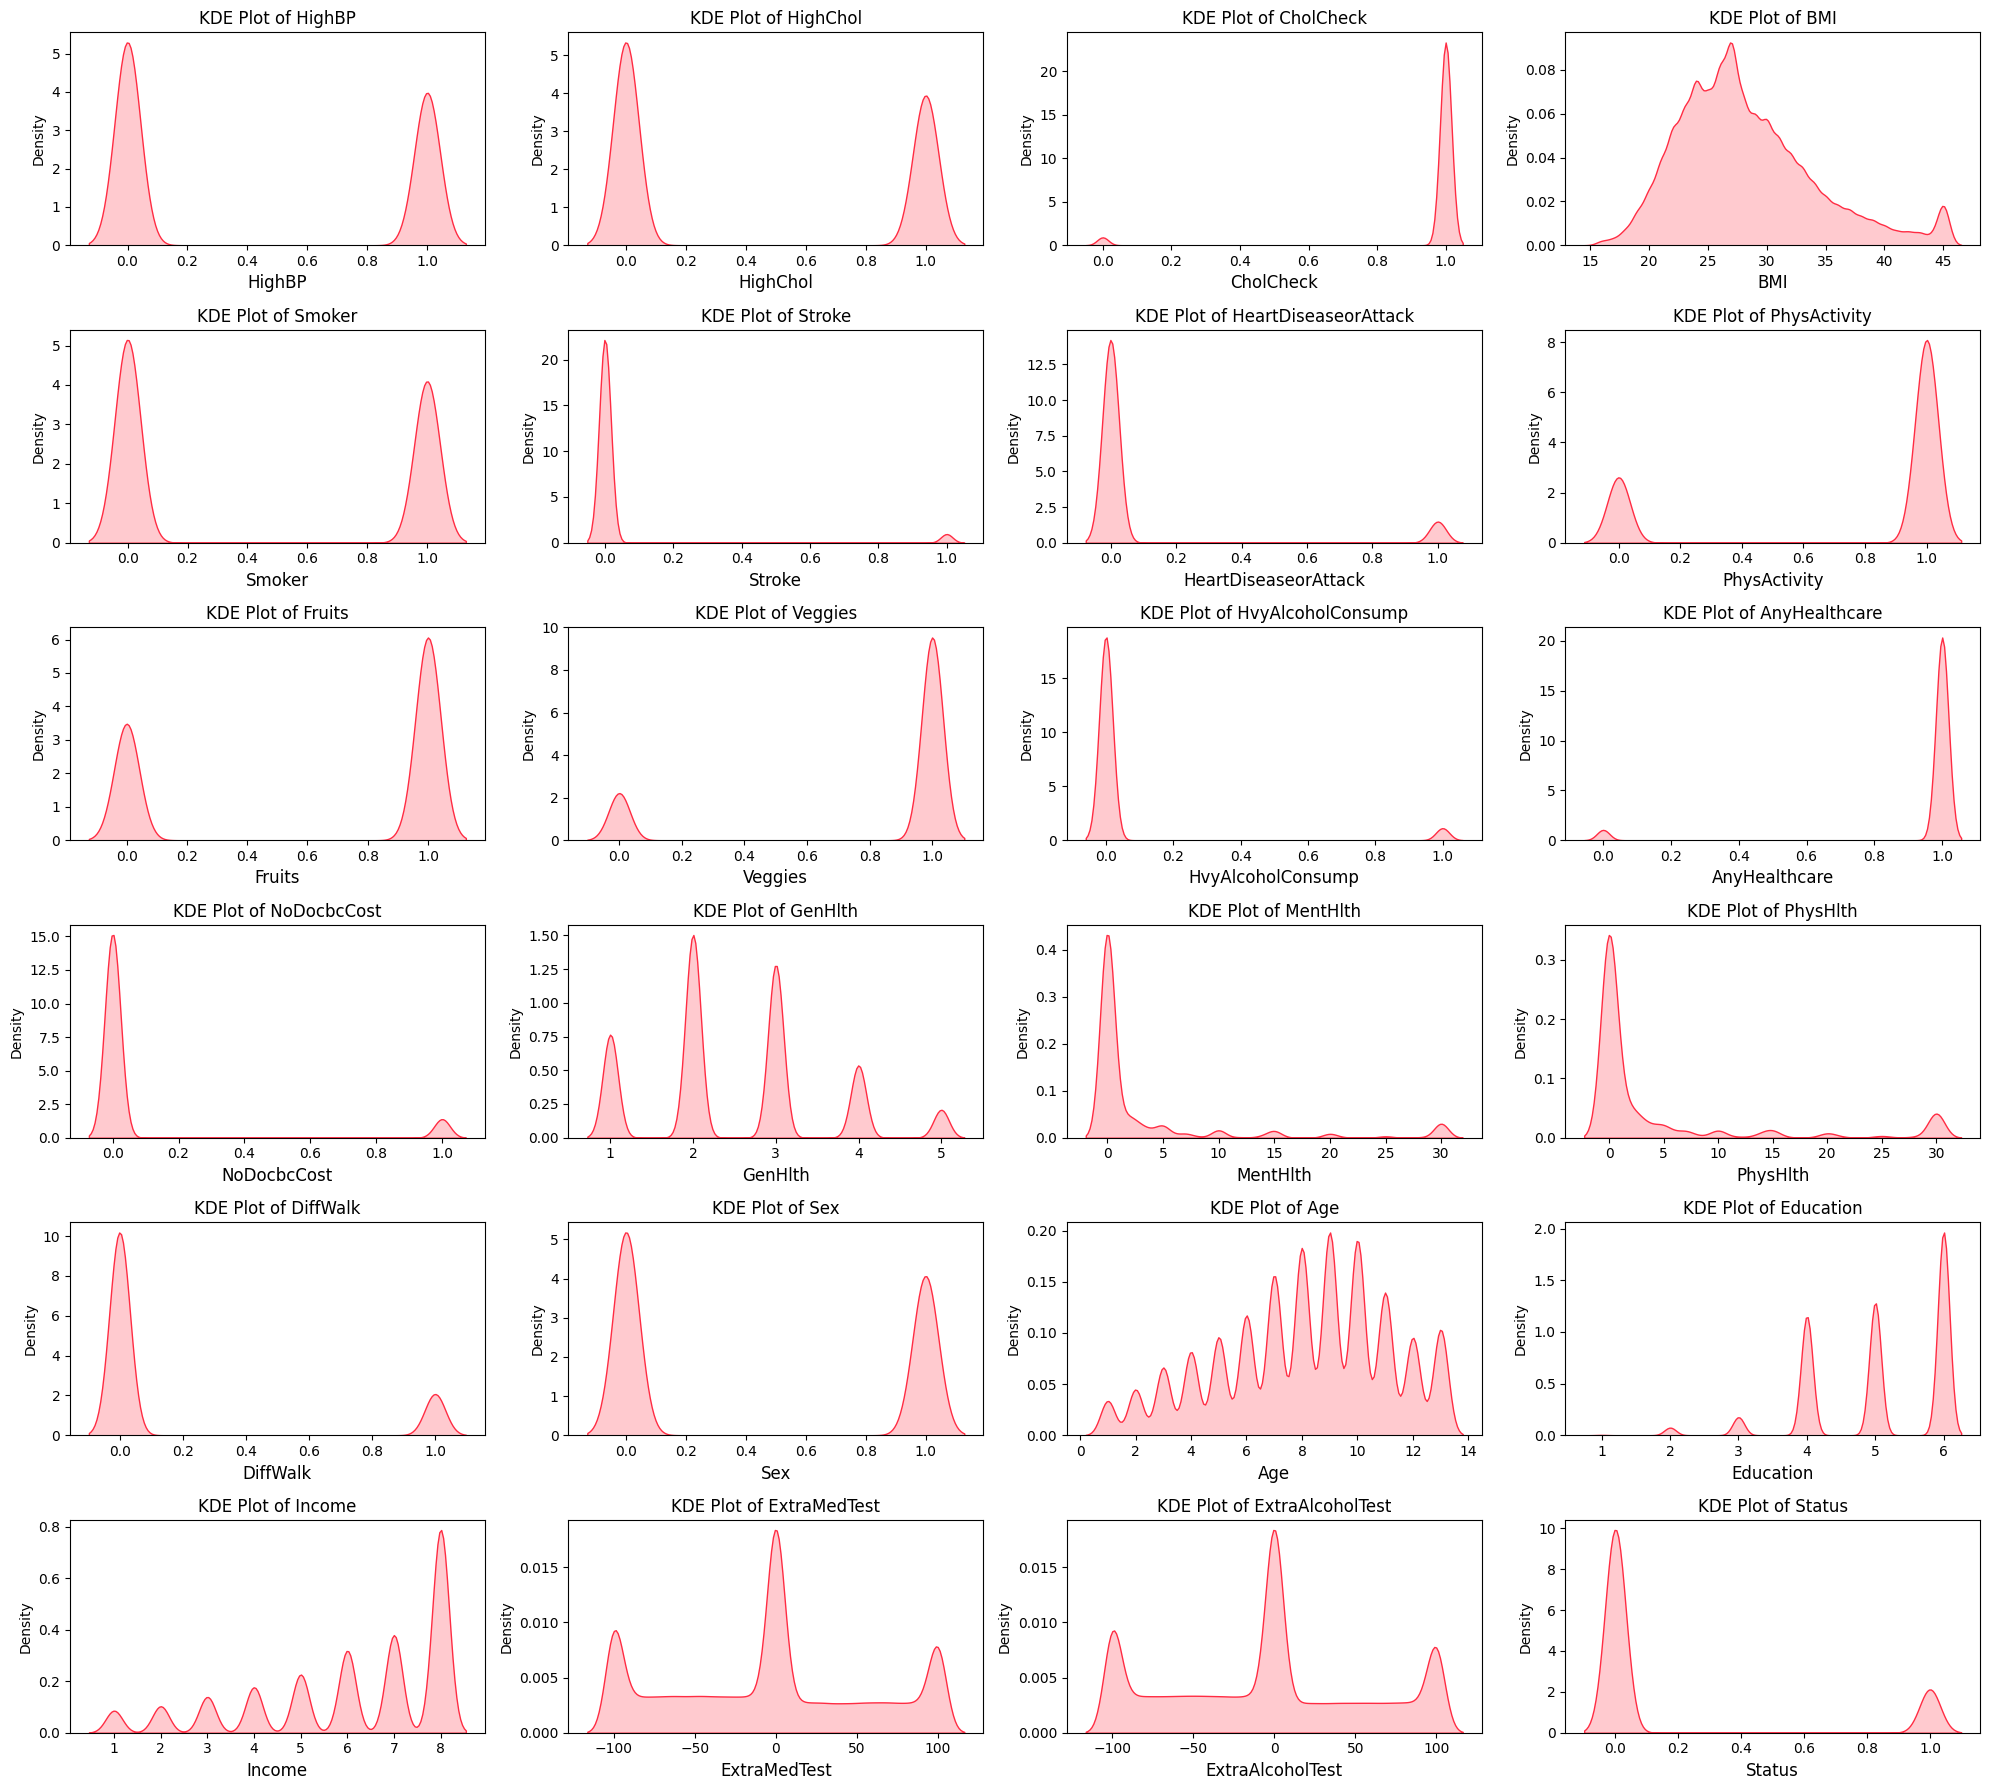

In [923]:
# Grid initialization
rows, cols = len(df_train_cleaned.columns) // 4, min(4, len(df_train_cleaned.columns))
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))  # Figure and axes

# Plot KDE for each column
for i, column in enumerate(df_train_cleaned.columns):
    sns.kdeplot(
        data=df_train_cleaned[column], ax=axes.flat[i], fill=True, color="#ff2c43"
    )  # KDE plot
    axes.flat[i].set_title(f"KDE Plot of {column}")  # Title
    axes.flat[i].set_xlabel(column, fontsize=12)  # X-axis label

plt.tight_layout()
plt.show()

### **Conclusion**:

- By examining the distribution of features, we can observe the following key points:

  - **Categorical Features**: The majority of the features are categorical, with binary values (`0` or `1`).

    &rarr; This characteristic will influence the choice of visualization techniques and model selection.

  - **Numerical Features**: The numerical features exhibit varying distributions, with the `BMI` feature showing a skewed distribution.

    &rarr; This observation will be considered during feature scaling and model selection.

  - **Target Variable Distribution**: The target variable (`Status`) discloses a significant imbalance, with only `17.67%` of the data belonging to the diabetic class (`1`).

    &rarr; This imbalance can potentially impact model performance and will be addressed through undersampling techniques.

### **Next Steps**:

- **In-depth Analysis**: Further analysis of feature distributions will be conducted to identify potential relationships between features and the target variable.

- **Feature Engineering**: EDA identified significant skewness in the distribution of most numerical data. To address this and ensure normality for modeling purposes, `MinMax scaling` or `Robust Scaling` will be employed. 

- **Model Selection**: The distribution of features and target variable will influence the choice of models. Techniques such as `Logistic Regression`, `Random Forest`, and `Decision Tree` are potential candidates for classification tasks.

- **Imbalanced Data Handling**: The imbalanced distribution of the target variable will be addressed through techniques such as `undersampling` or `oversampling` to ensure model performance is not biased towards the majority class.


### 2.1: Categorical Features

#### 2.1.1: Configuration

In [924]:
# Global constants
FIG_TITLE_FONTSIZE = 20  # Figure title font
FIG_TITLE_WEIGHT = "semibold"  # Figure title weight
AXIS_LABEL_FONTSIZE = 15  # Axis label font

# Extracting data from df_train_cleaned["Status"]
status_data = df_train_cleaned["Status"]

#### 2.1.1: Target Variable (`Status`)

##### 2.1.1.1: Data Visualization

┌──────────────────────┐
│  Distribution Chart  │
└──────────────────────┘


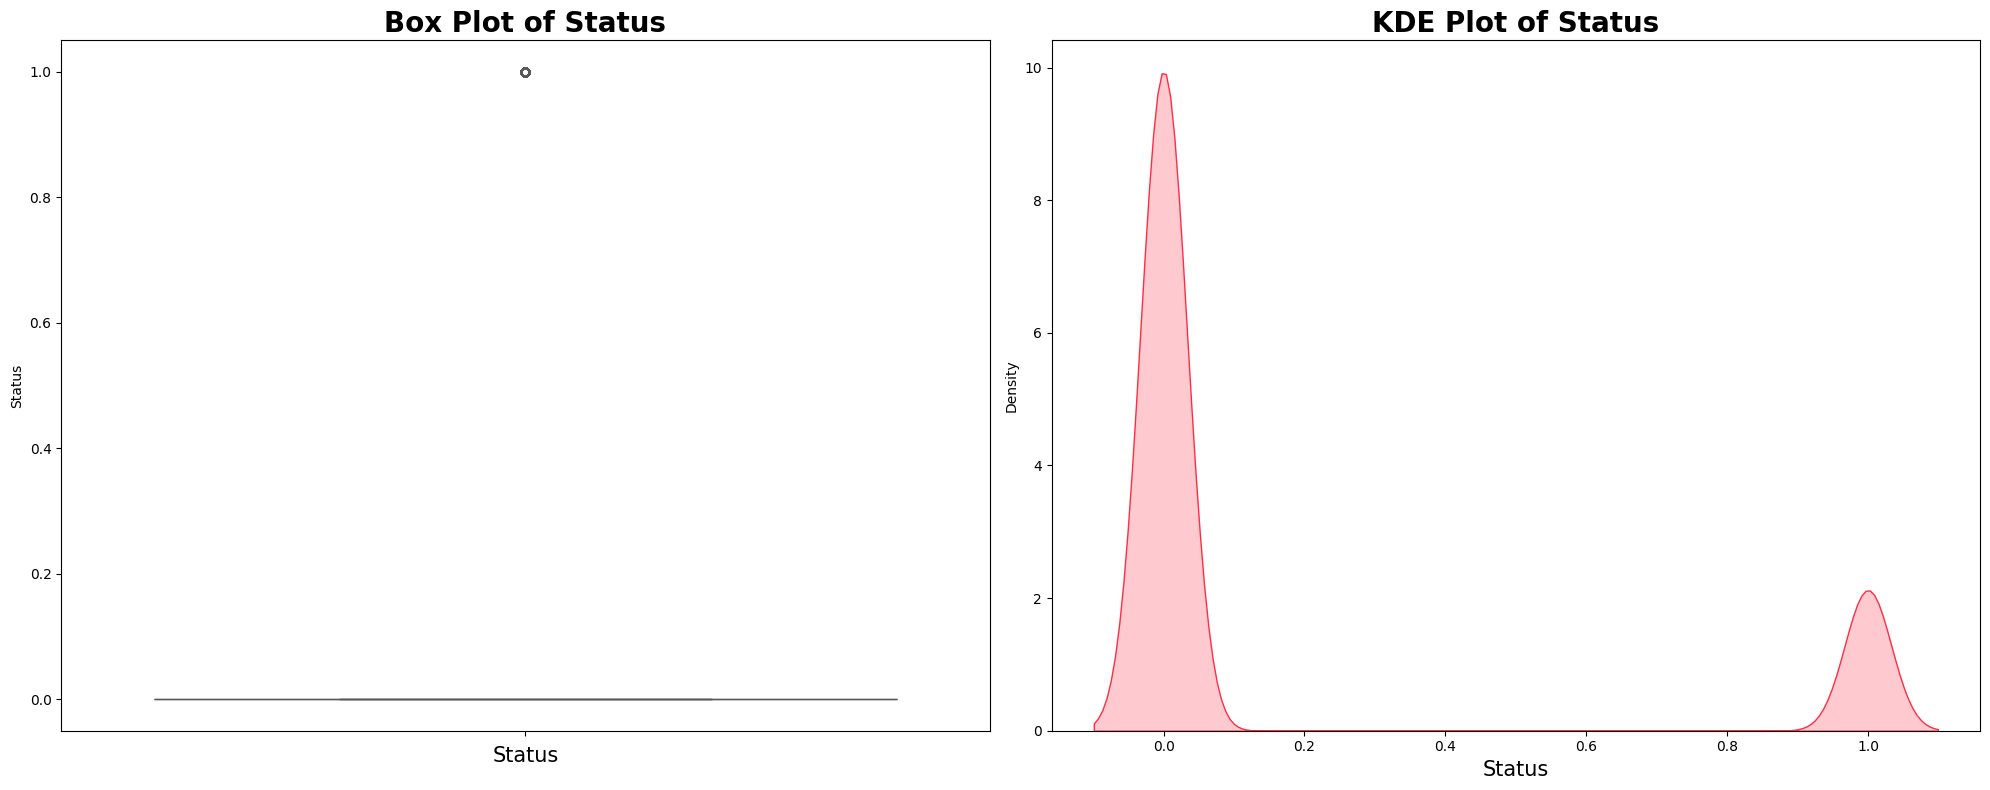

In [925]:
# Display the distribution chart
styler.draw_box("Distribution Chart")

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot box plot
sns.boxplot(data=df_train_cleaned["Status"], ax=axes[0], color="#ff2c43")
axes[0].set_title(
    "Box Plot of Status", fontsize=FIG_TITLE_FONTSIZE, fontweight=FIG_TITLE_WEIGHT
)
axes[0].set_xlabel("Status", fontsize=AXIS_LABEL_FONTSIZE)

# Plot KDE plot
sns.kdeplot(data=df_train_cleaned["Status"], ax=axes[1], fill=True, color="#ff2c43")
axes[1].set_title(
    "KDE Plot of Status", fontsize=FIG_TITLE_FONTSIZE, fontweight=FIG_TITLE_WEIGHT
)
axes[1].set_xlabel("Status", fontsize=AXIS_LABEL_FONTSIZE)

plt.tight_layout()
plt.show()

##### 2.1.1.2: Data Overview

In [926]:
styler.draw_box("Feature Essence (Status)")
start_time = time.time()  # Start time

print(neko.feature_essence(df_train_cleaned, "Status", tablefmt="rounded_grid"))

end_time = time.time()  # End time
runtime = end_time - start_time  # Runtime

print(f"\n>>> Done in: {round(runtime, 3)} seconds")  # Display runtime

┌────────────────────────────┐
│  Feature Essence (Status)  │
└────────────────────────────┘
╭────┬────────────────────┬─────────────────────╮
│    │ Attribute          │ Value               │
├────┼────────────────────┼─────────────────────┤
│  0 │ Feature            │ Status              │
├────┼────────────────────┼─────────────────────┤
│  1 │ Data Type          │ int64               │
├────┼────────────────────┼─────────────────────┤
│  2 │ Total Values       │ 202736              │
├────┼────────────────────┼─────────────────────┤
│  3 │ Missing Values     │ 0                   │
├────┼────────────────────┼─────────────────────┤
│  4 │ Unique Values      │ 2                   │
├────┼────────────────────┼─────────────────────┤
│  5 │ Minimum Value      │ 0                   │
├────┼────────────────────┼─────────────────────┤
│  6 │ 25th Percentile    │ 0.0                 │
├────┼────────────────────┼─────────────────────┤
│  7 │ Median             │ 0.0                 │
├────┼─

##### 2.1.1.3: Frequency Distribution

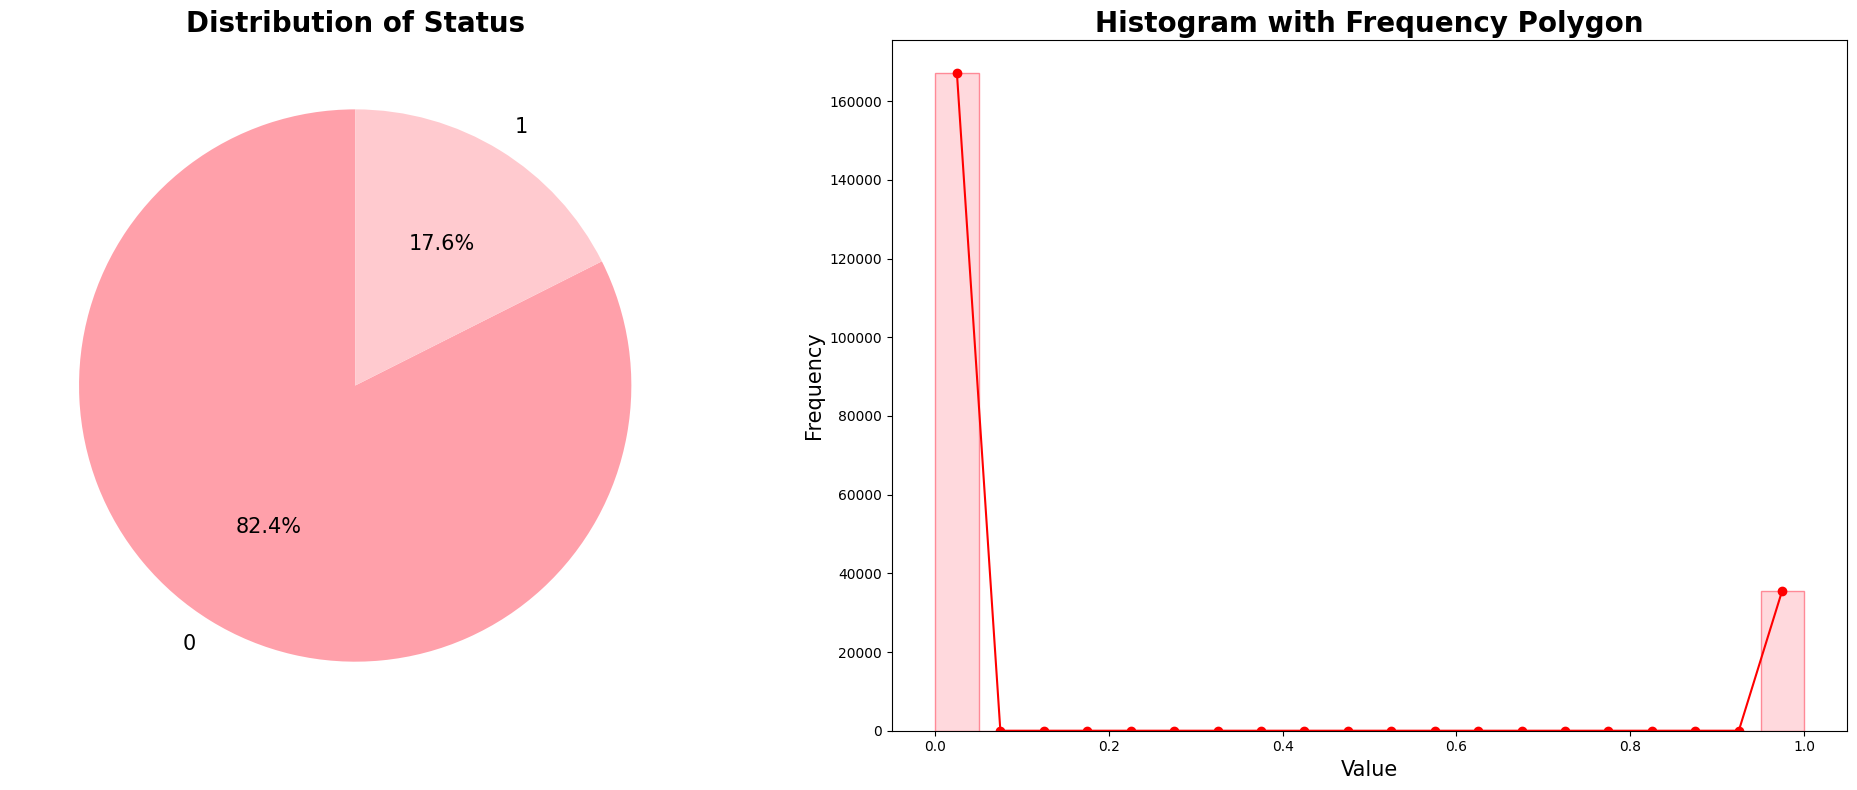

In [927]:
# Create a new figure
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot pie chart
status_counts = df_train_cleaned["Status"].value_counts()

neko.plot_pie_chart(
    axes[0],
    status_counts,
    "Distribution of Status",
    ["#FF617299", "#ffcacf"],
    title_fontsize=FIG_TITLE_FONTSIZE,
    title_fontweight=FIG_TITLE_WEIGHT,
    axis_label_fontsize=AXIS_LABEL_FONTSIZE,
)


# Plot histogram with frequency polygon
neko.plot_histogram_with_polygon(
    data=status_data,
    axes=axes[1],
    bins=20,
    title="Histogram with Frequency Polygon",
    xlabel="Value",
    ylabel="Frequency",
    title_fontsize=FIG_TITLE_FONTSIZE,
    title_fontweight=FIG_TITLE_WEIGHT,
    axis_label_fontsize=AXIS_LABEL_FONTSIZE,
)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### **Conclusion**:
- As observed, the target variable (`Status`) exhibits a significant imbalance, with only `17.67%` of the data belonging to the diabetic class (`1`).

  &rarr; This imbalance can potentially impact model performance, leading to biased predictions. To address this issue, we will employ `undersampling` techniques to balance the dataset before model training.

#### 2.1.2: High Blood Pressure (`HighBP`)

#### 2.1.3: High Cholesterol (`HighChol`)

#### 2.1.4: Cholesterol Check (`CholCheck`)

#### 2.1.5: Body Mass Index (`BMI`)

#### 2.1.6: Smoker (`Smoker`)

#### 2.1.7: Stroke (`Stroke`)

#### 2.1.8: Heart Disease or Attack (`HeartDiseaseorAttack`)

#### 2.1.9: Physical Activity (`PhysActivity`) 

#### 2.1.9: Physical Activity (`PhysActivity`)

#### 2.1.10: Fruits Consumption (`Fruits`)

#### 2.1.11: Vegetables Consumption (`Veggies`)

#### 2.1.12: Heavy Alcohol Consumption (`HvyAlcoholConsump`)

#### 2.1.13: Healthcare Coverage (`AnyHealthcare`)

#### 2.1.14: Unable to See Doctor Due to Cost (`NoDocbcCost`)

#### 2.1.15: General Health (`GenHlth`)

#### 2.1.16: Mental Health (`MentHlth`)

#### 2.1.17: Physical Health (`PhysHlth`)

#### 2.1.18: Difficulty Walking or Climbing Stairs (`DiffWalk`)

#### 2.1.19: Sex (`Sex`)

#### 2.1.20: Age (`Age`)

#### 2.1.21: Education (`Education`)

#### 2.1.22: Income (`Income`)

#### 2.1.23: Extra Medical Test (`ExtraMedTest`)

#### 2.1.24: Extra Alcohol Test (`ExtraAlcoholTest`)